In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
pd.options.display.max_colwidth = 3000

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
lieb = pd.read_csv("../data/liebherr_news_list.csv")
lieb.shape

(820, 9)

In [3]:
lieb = lieb.loc[~lieb["제목"].isnull()]
lieb = lieb.fillna("")
lieb.isnull().sum()

제목      0
날짜      0
링크      0
요약      0
type    0
date    0
토픽      0
중요      0
내용      0
dtype: int64

In [4]:
df = lieb[["type", "date", "링크", "제목"]]
df["contents"] = lieb["토픽"] + lieb["중요"] + lieb["내용"]
df.head(1)

,type,date,링크,제목,contents
0,Press releases,05/15/2023,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/liebherr-presents-the-new-lh-26-m-timber-litronic-at-ligna-2023-in-hanover.html,Liebherr presents the new LH 26 M Timber Litronic at LIGNA 2023 in Hanover,"Powerful machine for efficient timber handling. Thanks to its compact design, it is ideal for use in sawmills and lumber yards with limited space. The new addition is the smallest machine in Liebherr's existing portfolio of material handlers in the 25-tonne rangeLiebherr will unveil the new LH 26 M Timber Litronic for efficient timber handling at the world's leading trade fair LIGNA in Hanover. Thanks to its extremely compact design and exceptional manoeuvrability, this specialist machine is ideal for use in sawmills and lumber yards where space is at a premium. The new handling machine also boasts impressively low fuel consumption when operating at maximum capacity. Liebherr will also demonstrate its new integrated tyre pressure monitoring system on the material handler for the first time. With the LH 26 M Timber Litronic, Liebherr will present a new timber truck to the public at LIGNA that extends its existing portfolio to include a lighter machine with an operating mass of between 23,500 and 26,000 kg. Liebherr will also showcase its new, integrated tyre pressure monitoring system as part of its trade fair exhibit. This system allows the desired target tyre pressure to be set and monitored on the display in the operator's cab. The system will be optionally available for Liebherr material handlers from October.Liebherr's trade fair exhibit also includes a straight 6.6 m long boom and a 5 m long stick with an angled stick end as well as a Liebherr type GM 10B wood grapple with a capacity of up to 1.30 m². The machine configuration also includes the 1.2 m high, rigid cab elevation LFC 120 for optimum visibility and a 3 m wide support blade at the rear. Maximum splash protection is provided thanks to the hot-dip galvanised mudguards, which also serve as a platform for easy and safe access to the operator's cab.The new machine combines high driving performance with compact dimensionsThe engine power of 125 kW / 170 hp provides the system with a large amount of torque, which allows the machine to accelerate quickly. In combination with the high pump flow, this guarantees fast, dynamic work movements and therefore maximum handling capacity.Thanks to its compact design, the new machine is ideal for use in confined spaces. It’s extremely small front and tail swing radius enables the machine to turn around completely even in very narrow operating locations. The minimal contours of the right front side enable the machine to work very close to sorting lines or timber stacks as it is always within the width of the undercarriage. This ensures an excellent view of the working area, ensures additional safety and prevents collisions.Four-wheel steering for greater manoeuvrability and integrated tyre pressure monitoring systemTo ensure excellent manoeuvrability and agility, the LH 26 M Timber is equipped with four-wheel steering as standard. The four-wheel steering increases driving stability and thus improves the machine's directional stability. The automa..."


In [5]:
df["date"] = pd.to_datetime(df["date"].copy())

In [6]:
df["sentenses"] = df["contents"].map(lambda x : x.split(". "))
df["sentenses"].tail(1)

819    [Liebherr USA Mining is pleased to announce the addition of Lincoln Klemola, In his role as Manager of Field Services, Lincoln will oversee and manage customer support for Liebherr Mining machines in the U.S, He will serve as the primary service contact for Liebherr Mining customers within the U.S., lead the entire service and support team, and expand on Liebherr’s current growth strategy for the U.S, market.Lincoln has more than 20 years experience in the mining industry, Thoughout his career, he has held previous positions such as: Technical Trainer of large mining equipment, Field Service Technician of large diesel electric mining equipment and most recently, Service Manager for a large industrial machinery and equipment distributor.His extensive experience and accomplishments encompasses all areas of the supplier business, From increasing profitability of diverse product lines, leading customer service teams and service technicians in service and repair of mining equipment, 

In [7]:
df["words"] = df["contents"].replace("\.|\,|:", "", regex=True).map(lambda x : x.split(" "))
df["words"][:10]

0                                                                    [Powerful, machine, for, efficient, timber, handling, Thanks, to, its, compact, design, it, is, ideal, for, use, in, sawmills, and, lumber, yards, with, limited, space, The, new, addition, is, the, smallest, machine, in, Liebherr's, existing, portfolio, of, material, handlers, in, the, 25-tonne, rangeLiebherr, will, unveil, the, new, LH, 26, M, Timber, Litronic, for, efficient, timber, handling, at, the, world's, leading, trade, fair, LIGNA, in, Hanover, Thanks, to, its, extremely, compact, design, and, exceptional, manoeuvrability, this, specialist, machine, is, ideal, for, use, in, sawmills, and, lumber, yards, where, space, is, at, a, premium, The, new, handling, machine, also, boasts, impressively, low, fuel, ...]
1                                [Liebherr, L 580, LogHandler, XPower®, as, special, wheel, loader, for, handling, logs, Power-split, travel, drive, increases, productivity, new, lift, arms, and, optimis

In [8]:
df.to_csv("../data/liebherr_words.csv", index=False)

In [25]:
df.to_excel("../data/liebherr_words.xlsx", index=False)

### 불용어 공용으로 처리

In [60]:
# 불용어
stop_words = ["a"          ,"but"        , "during"     ,"hows"      , "it's"    , "said"     ,     "this"       ,"we’re"      ,"who’ve"  
,"about"      ,"by"         , "each"       ,"however"   , "it’s"    , "says"     ,     "those"      ,"we've"      ,"whove"   
,"above"      ,"can"        , "either"     ,"i"         , "its"     , "see"      ,     "through"    ,"we’ve"      ,"will"    
,"across"     ,"can't"      , "for"        ,"i'd"       , "let's"   , "she"      ,     "to"         ,"weve"       ,"with"    
,"after"      ,"can’t"      , "from"       ,"i’d"       , "let’s"   , "she'd"    ,     "too"        ,"were"       ,"within"  
,"all"        ,"cant"       , "given"      ,"i'll"      , "lets"    , "she’d"    ,     "towards"    ,"what"       ,"without" 
,"along"      ,"cannot"     , "had"        ,"i’ll"      , "may"     , "shed"     ,     "under"      ,"what's"     ,"won't"   
,"also"       ,"could"      , "has"        ,"i'm"       , "me"      , "she'll"   ,     "until"      ,"what’s"     ,"won’t"   
,"am"         ,"couldn't"   , "have"       ,"i’m"       , "more"    , "she’ll"   ,     "us"         ,"whats"      ,"would"   
,"an"         ,"couldn’t"   , "having"     ,"im"        , "most"    , "shell"    ,     "use"        ,"when"       ,"wouldn't"
,"and"        ,"couldnt"    , "he"         ,"i've"      , "much"    , "should"   ,     "used"       ,"when's"     ,"wouldn’t"
,"any"        ,"did"        , "he'd"       ,"i’ve"      , "must"    , "since"    ,     "uses"       ,"when’s"     ,"you"     
,"are"        ,"didn't"     , "he’d"       ,"ive"       , "my"      , "so"       ,     "using"      ,"whens"      ,"you'd"   
,"aren't"     ,"didn’t"     , "hed"        ,"if"        , "no"      , "some"     ,     "very"       ,"where"      ,"you’d"   
,"aren’t"     ,"didnt"      , "he'll"      ,"in"        , "not"     , "such"     ,     "want"       ,"whether"    ,"youd"    
,"arent"      ,"do"         , "he’ll"      ,"instead"   , "now"     , "than"     ,     "was"        ,"which"      ,"you'll"  
,"as"         ,"does"       , "her"        ,"into"      , "of"      , "that"     ,     "wasn't"     ,"while"      ,"you’ll"  
,"at"         ,"doesn't"    , "here"       ,"is"        , "on"      , "the"      ,     "wasn’t"     ,"who"        ,"youll"   
,"be"         ,"doesn’t"    , "hers"       ,"isn't"     , "one"     , "their"    ,     "wasnt"      ,"who'll"     ,"you're"  
,"because"    ,"doesnt"     , "him"        ,"isn’t"     , "only"    , "them"     ,     "we"         ,"who’ll"     ,"you’re"  
,"been"       ,"doing"      , "himself"    ,"isnt"      , "or"      , "then"     ,     "we'd"       ,"wholl"      ,"youre"   
,"before"     ,"done"       , "his"        ,"it"        , "other"   , "there"    ,     "we’d"       ,"who's"      ,"you've"  
,"being"      ,"don't"      , "how"        ,"it'll"     , "our"     , "therefore",     "we'll"      ,"who’s"      ,"you’ve"  
,"between"    ,"don’t"      , "how's"      ,"it’ll"     , "out"     , "these"    ,     "we’ll"      ,"whos"       ,"youve"   
,"both"       ,"dont"       , "how’s"      ,"itll"      , "over"    , "they"     ,     "we're"      ,"who've"     ,"your"    
,"customer", "machine", "liebherr's", "liebherr", "year", "years", "crane", "cranes", "-" , "2023", "2022", "2022", "–", "", " "]

In [69]:
pd.Series(stop_words).to_csv("../common/stop_words.csv", index=False)

In [70]:
pd.read_csv("../common/stop_words.csv")

,0
0,a
1,but
2,during
3,hows
4,it's
...,...
234,2023
235,2022
236,2022
237,–


# 기간 별 단어 빈도

### 제목 단어 빈도

In [12]:
title_df = df[["date", "제목"]]
title_df.tail()

,date,제목
815,2020-10-22,Closing the gap – Schlamann takes delivery of Liebherr LTM 1060-3.1 mobile crane
816,2020-10-20,Increased hoist height and radius – Liebherr unveils a jewel for any crane fleet with the LTM 1150-5.3
817,2020-10-19,Mammoet takes delivery of first ever Liebherr LTM 1650- 8.1 mobile crane
818,2020-10-15,New top dog – Sommer invests in Liebherr LTM 1750-9.1 mobile crane
819,2020-10-14,"Liebherr USA, Co. adds Lincoln Klemola as new Manager of Field Services for its Mining division"


In [13]:
title_df["word"] = title_df["제목"].map(lambda x: x.split())
title_df.tail()

,date,제목,word
815,2020-10-22,Closing the gap – Schlamann takes delivery of Liebherr LTM 1060-3.1 mobile crane,"[Closing, the, gap, –, Schlamann, takes, delivery, of, Liebherr, LTM, 1060-3.1, mobile, crane]"
816,2020-10-20,Increased hoist height and radius – Liebherr unveils a jewel for any crane fleet with the LTM 1150-5.3,"[Increased, hoist, height, and, radius, –, Liebherr, unveils, a, jewel, for, any, crane, fleet, with, the, LTM, 1150-5.3]"
817,2020-10-19,Mammoet takes delivery of first ever Liebherr LTM 1650- 8.1 mobile crane,"[Mammoet, takes, delivery, of, first, ever, Liebherr, LTM, 1650-, 8.1, mobile, crane]"
818,2020-10-15,New top dog – Sommer invests in Liebherr LTM 1750-9.1 mobile crane,"[New, top, dog, –, Sommer, invests, in, Liebherr, LTM, 1750-9.1, mobile, crane]"
819,2020-10-14,"Liebherr USA, Co. adds Lincoln Klemola as new Manager of Field Services for its Mining division","[Liebherr, USA,, Co., adds, Lincoln, Klemola, as, new, Manager, of, Field, Services, for, its, Mining, division]"


In [14]:
# 불용어처리
def stop_words_out(words):
    result = []
    for w in words: 
        if w.strip().casefold() not in stop_words:
            result.append(w)
    return " ".join(result)

In [15]:
title_df.tail()

,date,제목,word
815,2020-10-22,Closing the gap – Schlamann takes delivery of Liebherr LTM 1060-3.1 mobile crane,"[Closing, the, gap, –, Schlamann, takes, delivery, of, Liebherr, LTM, 1060-3.1, mobile, crane]"
816,2020-10-20,Increased hoist height and radius – Liebherr unveils a jewel for any crane fleet with the LTM 1150-5.3,"[Increased, hoist, height, and, radius, –, Liebherr, unveils, a, jewel, for, any, crane, fleet, with, the, LTM, 1150-5.3]"
817,2020-10-19,Mammoet takes delivery of first ever Liebherr LTM 1650- 8.1 mobile crane,"[Mammoet, takes, delivery, of, first, ever, Liebherr, LTM, 1650-, 8.1, mobile, crane]"
818,2020-10-15,New top dog – Sommer invests in Liebherr LTM 1750-9.1 mobile crane,"[New, top, dog, –, Sommer, invests, in, Liebherr, LTM, 1750-9.1, mobile, crane]"
819,2020-10-14,"Liebherr USA, Co. adds Lincoln Klemola as new Manager of Field Services for its Mining division","[Liebherr, USA,, Co., adds, Lincoln, Klemola, as, new, Manager, of, Field, Services, for, its, Mining, division]"


In [16]:
title_df["clear_word"] = title_df["word"].apply(stop_words_out)
title_df["clear_word"]

0                            presents new LH 26 M Timber Litronic LIGNA Hanover
1                                New L 580 LogHandler XPower® makes début Ligna
2                                        ISO Limited advance New Zealand timber
3                                           wins ESTA Award 'Training' category
4                                                      exhibit Elko Mining Expo
                                         ...                                   
815                    Closing gap Schlamann takes delivery LTM 1060-3.1 mobile
816              Increased hoist height radius unveils jewel fleet LTM 1150-5.3
817                      Mammoet takes delivery first ever LTM 1650- 8.1 mobile
818                              New top dog Sommer invests LTM 1750-9.1 mobile
819    USA, Co. adds Lincoln Klemola new Manager Field Services Mining division
Name: clear_word, Length: 818, dtype: object

## 제목 워드 클라우드

In [17]:
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=850, background_color="white", random_state=0, font_path=r'c:\Windows\Fonts\malgun.ttf')

In [18]:
# 한달전
# 지금은 하드코딩 나중에 자동화 형식으로 바꾸자
a_month_title = " ".join(list(title_df.loc[title_df["date"] > "2023-04-26"]["clear_word"]))
a_month_title

"presents new LH 26 M Timber Litronic LIGNA Hanover New L 580 LogHandler XPower® makes début Ligna ISO Limited advance New Zealand timber wins ESTA Award 'Training' category exhibit Elko Mining Expo Control international trade fair quality assurance Stuttgart Successful participation MRO Americas LIGNA 2023: Special machines solutions timber forestry industry 5 assistance systems keep safe jobsite First LR 1400 SX Middle East “The King Barges” work Europe's first CO2-neutral thermal spa Milan Three LR 1700-1.0 Canada GUAY reinforces crawler fleet 700 tonne models"

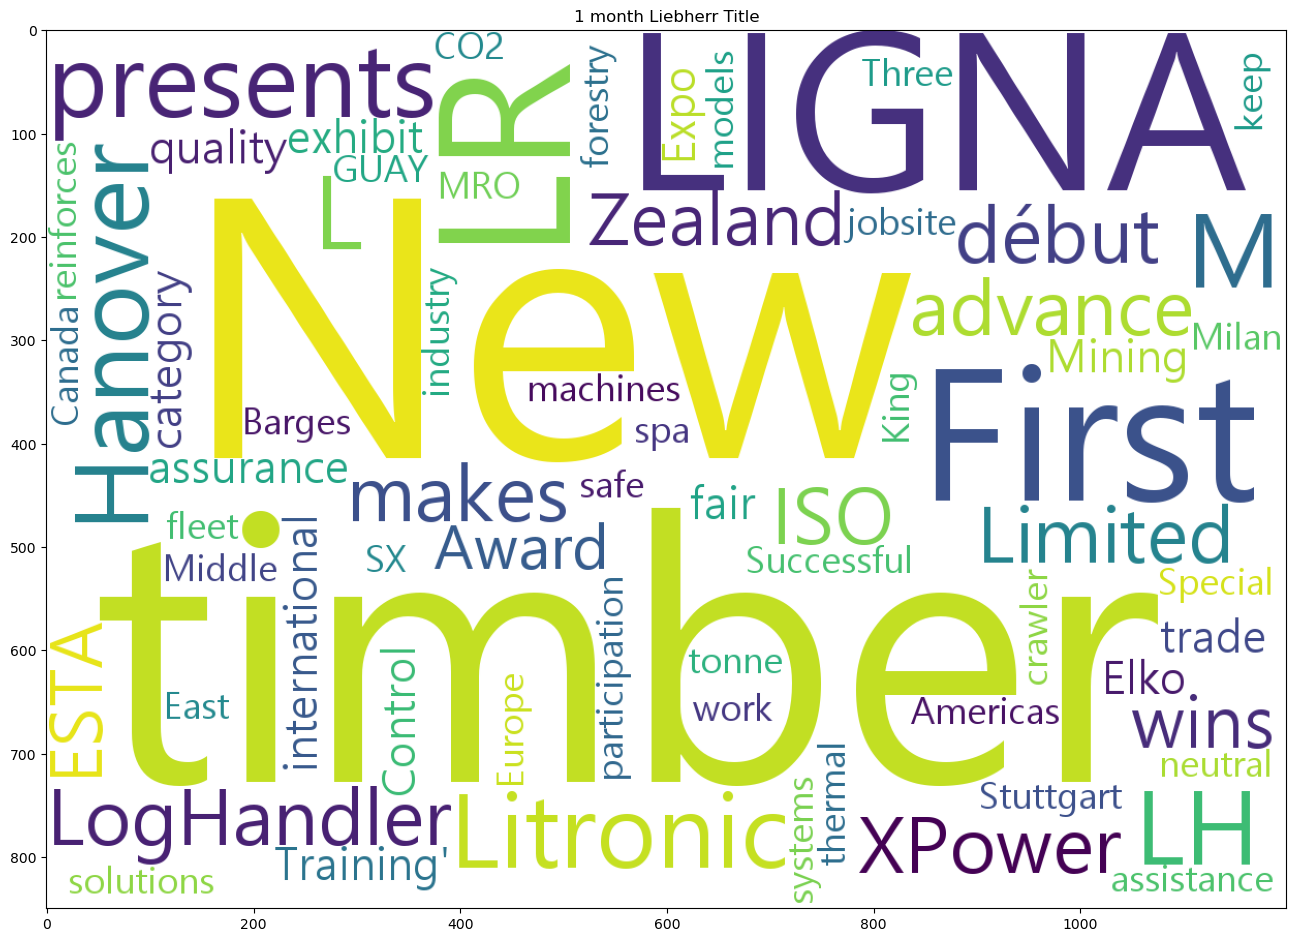

In [19]:
plt.figure(figsize=(16, 12))
plt.title("1 month Liebherr Title")
plt.imshow(wc.generate(a_month_title))

In [20]:
three_month_title = " ".join(list(title_df.loc[title_df["date"] > "2023-02-26"]["clear_word"]))
three_month_title

'presents new LH 26 M Timber Litronic LIGNA Hanover New L 580 LogHandler XPower® makes début Ligna ISO Limited advance New Zealand timber wins ESTA Award \'Training\' category exhibit Elko Mining Expo Control international trade fair quality assurance Stuttgart Successful participation MRO Americas LIGNA 2023: Special machines solutions timber forestry industry 5 assistance systems keep safe jobsite First LR 1400 SX Middle East “The King Barges” work Europe\'s first CO2-neutral thermal spa Milan Three LR 1700-1.0 Canada GUAY reinforces crawler fleet 700 tonne models ZF jointly develop high speed compressors International Metro Transit Exhibition & Forum Rothmund strengthens fleet LTM 1450-8.1 Top 5 takeaways booth Conexpo Liebherr’s highlights Liebherr-Aerospace & Transportation SAS successful first CDP EcoVadis ratings Liebherr-Aerospace again among Best Suppliers Embraer power energy transition Premiere Port Rostock: Sarens takes delivery first LR 12500-1.0 crawler Knock, knock. ther

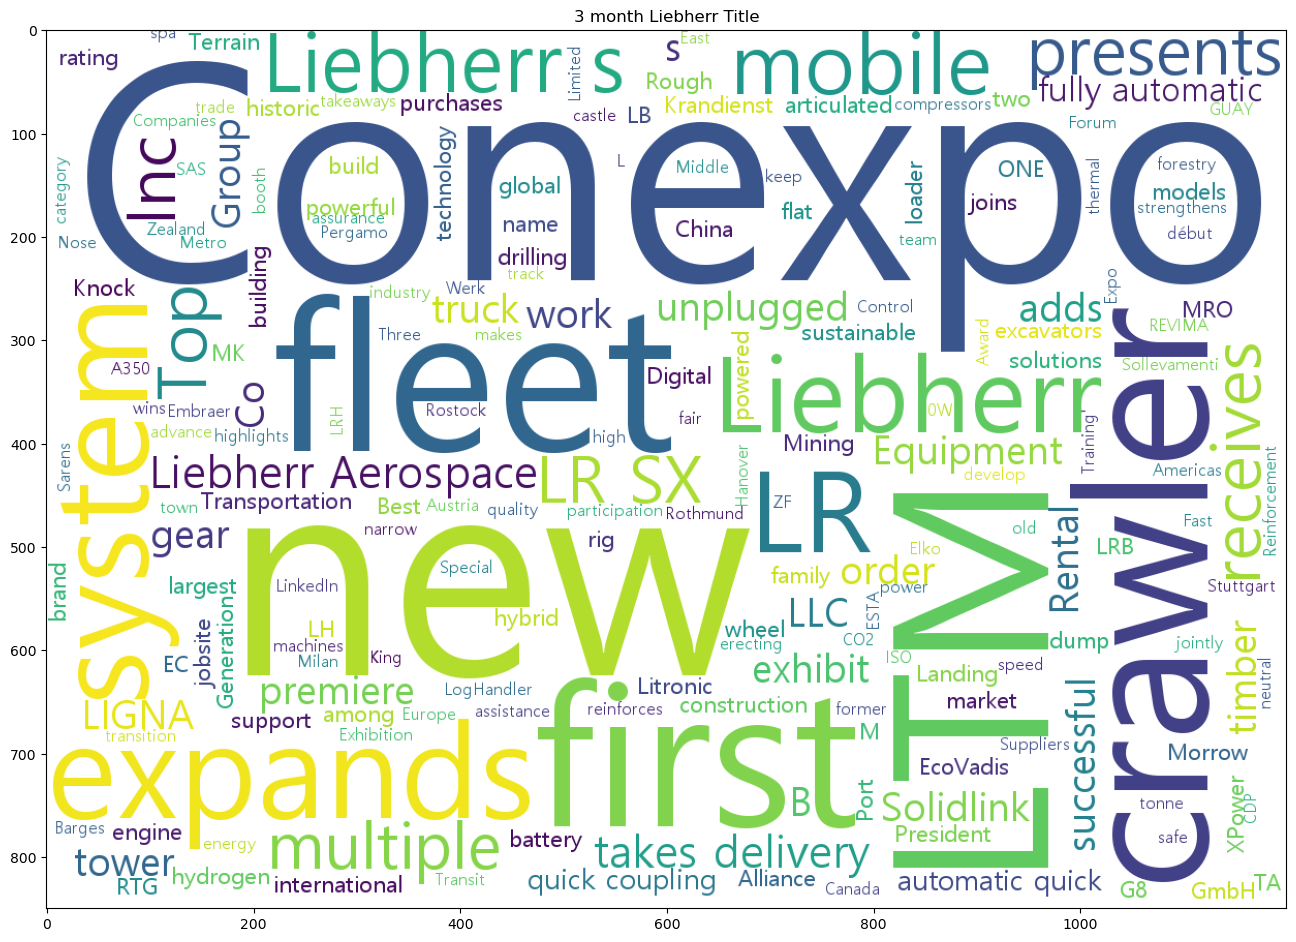

In [21]:
plt.figure(figsize=(16, 12))
plt.title("3 month Liebherr Title")
plt.imshow(wc.generate(three_month_title))

In [22]:
title_df.loc[(title_df["date"] <= "2023-02-26") & (title_df["date"] > "2022-11-26")][:3]

,date,제목,word,clear_word
113,2023-02-24,First Liebherr LTM 1450-8.1 mobile crane in Serbia,"[First, Liebherr, LTM, 1450-8.1, mobile, crane, in, Serbia]",First LTM 1450-8.1 mobile Serbia
114,2023-02-24,Liebherr-Aerospace at MRO Middle East 2023,"[Liebherr-Aerospace, at, MRO, Middle, East, 2023]",Liebherr-Aerospace MRO Middle East
115,2023-02-24,Four BOS-cranes shipped for gas project in Azerbaijan,"[Four, BOS-cranes, shipped, for, gas, project, in, Azerbaijan]",Four BOS-cranes shipped gas project Azerbaijan


In [23]:
before_three_month_title = " ".join(list(title_df.loc[(title_df["date"] <= "2023-02-26") & (title_df["date"] > "2022-11-26")]["clear_word"]))
before_three_month_title

'First LTM 1450-8.1 mobile Serbia Liebherr-Aerospace MRO Middle East Four BOS-cranes shipped gas project Azerbaijan Sims & Equipment takes delivery LR 1250.1 Unplugged Liebherr-Aerospace Heli-Expo Thirteen T 236 confirmed Nzema Gold Mine Ghana Thiess join forces strengthen presence Americas slewing bearings ensure self-alignment floating wind turbines Commissioning second giant excavator AMMAN RL 2600 shipped DolWin epsilon platform "On site": Conexpo Karunia invests four R 9300 mining excavators laboratory mixers concretes future Assembly via helicopter: flat-top work Mont Blanc crawler Grúas Aguilar erect retractable stadium roof Boeing delivers last 747-8 Liebherr-Aerospace board Interview: mental flexibility SmartMonitoring Liebherr-Aerospace Aero India Investing future: Schuch strengthens fleet mobile continuing success story: GMVykon bring first MK 88-4.1 Mexico unveil future freshness KBIS HS 8100.1 duty cycle crawler utilized Florida coast Eurogate CTW purchase two automated du

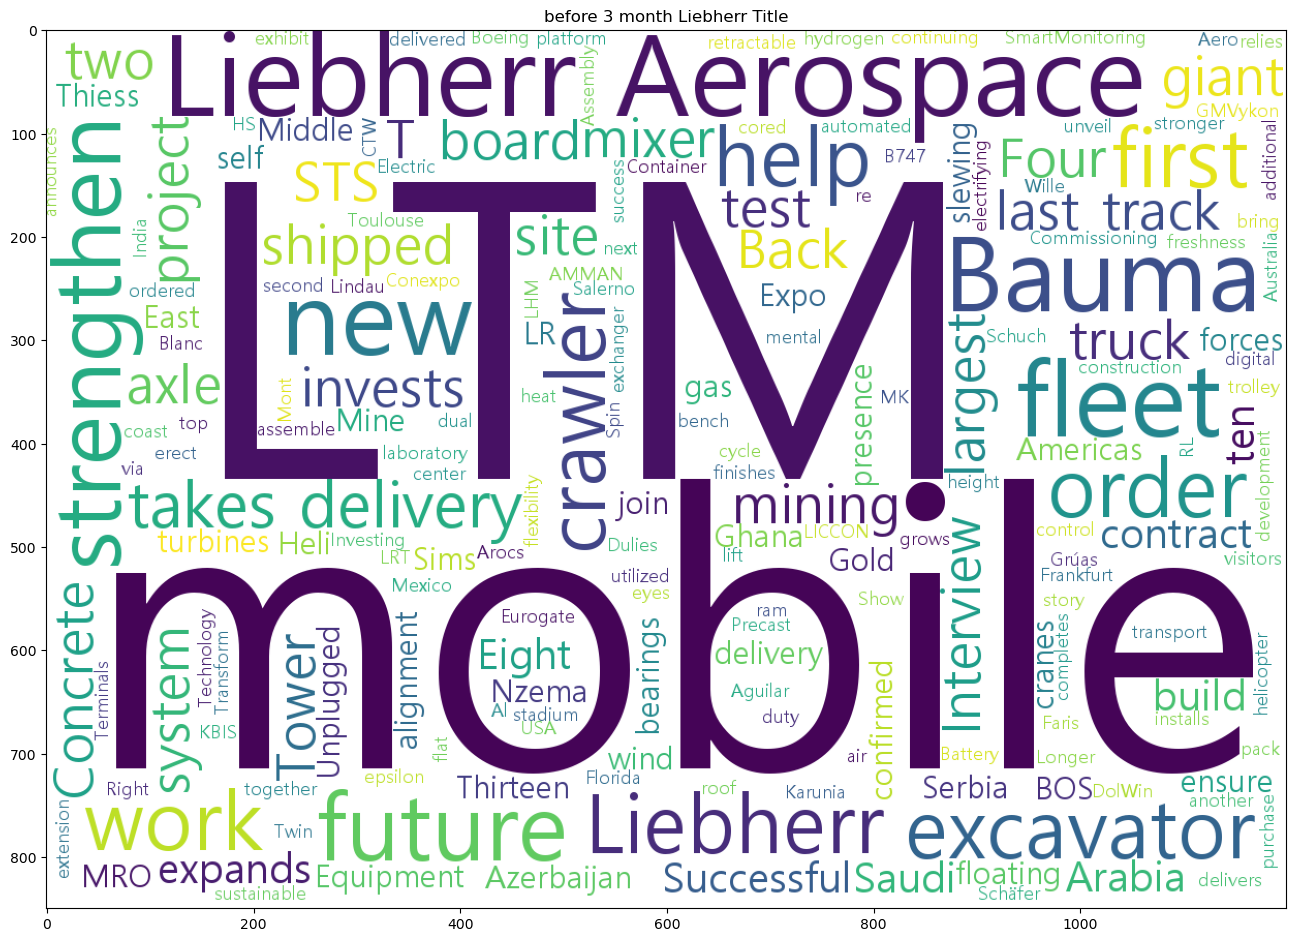

In [24]:
plt.figure(figsize=(16, 12))
plt.title("before 3 month Liebherr Title")
plt.imshow(wc.generate(before_three_month_title))

## 자주등장하는 순으로 단어 뽑아보기
- 제목도 리스트화

In [45]:
word = pd.read_csv("../common/stop_words.csv")
stop_words = word["0"].to_list()

In [61]:
# 불용어처리
def stop_words_out_list(words):
    result = []
    for w in words: 
        if w.strip().casefold() not in stop_words:
            result.append(w)
    return result

In [62]:
# 불용어처리하기
df["clear_words"] = df["words"].apply(stop_words_out_list)

In [63]:
df[["words", "clear_words"]][:2]

,words,clear_words
0,"[Powerful, machine, for, efficient, timber, handling, Thanks, to, its, compact, design, it, is, ideal, for, use, in, sawmills, and, lumber, yards, with, limited, space, The, new, addition, is, the, smallest, machine, in, Liebherr's, existing, portfolio, of, material, handlers, in, the, 25-tonne, rangeLiebherr, will, unveil, the, new, LH, 26, M, Timber, Litronic, for, efficient, timber, handling, at, the, world's, leading, trade, fair, LIGNA, in, Hanover, Thanks, to, its, extremely, compact, design, and, exceptional, manoeuvrability, this, specialist, machine, is, ideal, for, use, in, sawmills, and, lumber, yards, where, space, is, at, a, premium, The, new, handling, machine, also, boasts, impressively, low, fuel, ...]","[Powerful, efficient, timber, handling, Thanks, compact, design, ideal, sawmills, lumber, yards, limited, space, new, addition, smallest, existing, portfolio, material, handlers, 25-tonne, rangeLiebherr, unveil, new, LH, 26, M, Timber, Litronic, efficient, timber, handling, world's, leading, trade, fair, LIGNA, Hanover, Thanks, extremely, compact, design, exceptional, manoeuvrability, specialist, ideal, sawmills, lumber, yards, space, premium, new, handling, boasts, impressively, low, fuel, consumption, operating, maximum, capacity, demonstrate, new, integrated, tyre, pressure, monitoring, system, material, handler, first, time, LH 26 M, Timber, Litronic, present, new, timber, truck, public, LIGNA, extends, existing, portfolio, include, lighter, operating, mass, 23500, 26000 kg, showcase, new, integrated, tyre, pressure, monitoring, system, part, trade, fair, ...]"
1,"[Liebherr, L 580, LogHandler, XPower®, as, special, wheel, loader, for, handling, logs, Power-split, travel, drive, increases, productivity, new, lift, arms, and, optimised, grapple, Innovative, equipment, and, assistance, systems, for, convenient, and, safe, timber, handling, The, L 580, LogHandler, XPower®, will, make, its, trade, fair, début, in, May 2023, at, the, world-leading, Ligna, trade, fairLiebherr, will, exhibit, a, new, version, of, the, L, 580, LogHandler, XPower®, the, special, wheel, loader, for, the, timber, industry, The, overhauled, model, has, been, optimised, in, multiple, ways, including, the, lift, arms, which, have, been, developed, for, handling, logs, and, for, operating, with, the, relevant, grapples, The, modified, lift, ...]","[L 580, LogHandler, XPower®, special, wheel, loader, handling, logs, Power-split, travel, drive, increases, productivity, new, lift, arms, optimised, grapple, Innovative, equipment, assistance, systems, convenient, safe, timber, handling, L 580, LogHandler, XPower®, make, trade, fair, début, May 2023, world-leading, Ligna, trade, fairLiebherr, exhibit, new, version, L, 580, LogHandler, XPower®, special, wheel, loader, timber, industry, overhauled, model, optimised, multiple, ways, including, lift, arms, developed, handling, logs, operating, relevant, grapples, modified, lift, arms, capable, manipulation, heights, up, seven, metres, reach, nearly, four, metres, enabling, versatile, work, timber, yard, Structural, adjustments, particularly, swivel, arm, improve, visibility, innovations, help, operators, move, cubic, metres, wood, per, hour, increase, productivity, ...]"


In [64]:
len(df["words"][0]), len(df["clear_words"][0])

(753, 458)

### 단어들 갯수 세기

In [65]:
# 기사 하나로 테스트 해보기
history = {}  

for word in df["clear_words"][0]: 
    history[word] = history.get(word, 0) + 1 
print(history)

{'Powerful': 1, 'efficient': 3, 'timber': 6, 'handling': 5, 'Thanks': 2, 'compact': 4, 'design': 3, 'ideal': 3, 'sawmills': 2, 'lumber': 2, 'yards': 2, 'limited': 1, 'space': 2, 'new': 9, 'addition': 1, 'smallest': 1, 'existing': 2, 'portfolio': 2, 'material': 4, 'handlers': 2, '25-tonne': 1, 'rangeLiebherr': 1, 'unveil': 1, 'LH': 1, '26': 1, 'M': 1, 'Timber': 3, 'Litronic': 2, "world's": 1, 'leading': 1, 'trade': 3, 'fair': 3, 'LIGNA': 2, 'Hanover': 1, 'extremely': 2, 'exceptional': 1, 'manoeuvrability': 3, 'specialist': 1, 'premium': 1, 'boasts': 1, 'impressively': 1, 'low': 1, 'fuel': 2, 'consumption': 1, 'operating': 3, 'maximum': 3, 'capacity': 3, 'demonstrate': 1, 'integrated': 5, 'tyre': 9, 'pressure': 8, 'monitoring': 5, 'system': 7, 'handler': 2, 'first': 1, 'time': 1, 'LH\xa026\xa0M': 2, 'present': 1, 'truck': 1, 'public': 1, 'extends': 1, 'include': 1, 'lighter': 1, 'mass': 1, '23500': 1, '26000\xa0kg': 1, 'showcase': 1, 'part': 1, 'exhibit': 2, 'allows': 2, 'desired': 2, 't

In [66]:
history = {}  

for words in df["clear_words"]: 
    for word in words:
        history[word] = history.get(word, 0) + 1 
print(history)

{'Powerful': 20, 'efficient': 234, 'timber': 56, 'handling': 475, 'Thanks': 106, 'compact': 308, 'design': 442, 'ideal': 148, 'sawmills': 5, 'lumber': 5, 'yards': 4, 'limited': 47, 'space': 194, 'new': 2275, 'addition': 444, 'smallest': 23, 'existing': 135, 'portfolio': 206, 'material': 274, 'handlers': 38, '25-tonne': 2, 'rangeLiebherr': 4, 'unveil': 12, 'LH': 57, '26': 34, 'M': 60, 'Timber': 12, 'Litronic': 113, "world's": 25, 'leading': 98, 'trade': 165, 'fair': 123, 'LIGNA': 5, 'Hanover': 4, 'extremely': 136, 'exceptional': 37, 'manoeuvrability': 36, 'specialist': 73, 'premium': 19, 'boasts': 7, 'impressively': 12, 'low': 203, 'fuel': 391, 'consumption': 163, 'operating': 309, 'maximum': 423, 'capacity': 557, 'demonstrate': 28, 'integrated': 165, 'tyre': 43, 'pressure': 117, 'monitoring': 97, 'system': 1061, 'handler': 54, 'first': 692, 'time': 509, 'LH\xa026\xa0M': 20, 'present': 68, 'truck': 236, 'public': 70, 'extends': 35, 'include': 132, 'lighter': 30, 'mass': 8, '23500': 3, '

In [67]:
data = {"word":history.keys(), "count":history.values()}
count_df = pd.DataFrame.from_dict(data)
count_df

,word,count
0,Powerful,20
1,efficient,234
2,timber,56
3,handling,475
4,Thanks,106
...,...,...
26619,LUS,1
26620,sales”Lincoln,1
26621,western,1
26622,Gillette,1


In [74]:
count_df = count_df.sort_values(by="count", ascending=False)
count_df

,word,count
13,new,2275
52,system,1061
1463,construction,1044
282,release,986
580,mobile,952
...,...,...
14671,roadsThis,1
14673,LTM 1150-31,1
14675,LübeckClassic,1
14677,6-metre,1


In [75]:
count_df.to_csv("../data/lieb_words_count.csv", index=False)

In [76]:
pd.read_csv("../data/lieb_words_count.csv")

,word,count
0,new,2275
1,system,1061
2,construction,1044
3,release,986
4,mobile,952
...,...,...
26619,roadsThis,1
26620,LTM 1150-31,1
26621,LübeckClassic,1
26622,6-metre,1


In [82]:
title_df[["date", "제목"]].to_csv("../data/lieb_titles.csv", index=False, encoding="utf-8")

In [83]:
pd.read_csv("../data/lieb_titles.csv")

,date,제목
0,2023-05-15,Liebherr presents the new LH 26 M Timber Litronic at LIGNA 2023 in Hanover
1,2023-05-15,New Liebherr L 580 LogHandler XPower® makes its début at Ligna 2023
2,2023-05-10,ISO Limited and Liebherr advance New Zealand timber
3,2023-05-10,Liebherr wins ESTA Award in the 'Training' category
4,2023-05-04,Liebherr to exhibit at 2023 Elko Mining Expo
...,...,...
813,2020-10-22,Closing the gap – Schlamann takes delivery of Liebherr LTM 1060-3.1 mobile crane
814,2020-10-20,Increased hoist height and radius – Liebherr unveils a jewel for any crane fleet with the LTM 1150-5.3
815,2020-10-19,Mammoet takes delivery of first ever Liebherr LTM 1650- 8.1 mobile crane
816,2020-10-15,New top dog – Sommer invests in Liebherr LTM 1750-9.1 mobile crane
